# Random Forest x IRIS 

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt


#autres

### Importer le dataset IRIS 

In [2]:
df = pd.read_csv("iris.csv")

print(len(df))
df.head(10)

150


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Faite un dataFrame et renommer les colonnes 

In [5]:
df = df.rename(columns = {'sepal_length' :'sl','sepal_width':'sw','petal_length': 'pl','petal_width':'pw','species':'sp'})

In [6]:
df.head()

,sl,sw,pl,pw,sp
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Définir les variables features et la target & effectuer un split 

In [7]:
sp_label_encoder = LabelEncoder()
df.sp =sp_label_encoder.fit_transform(df.sp)
print(sp_label_encoder.classes_)
print(df.sp)

['setosa' 'versicolor' 'virginica']
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: sp, Length: 150, dtype: int32


In [8]:
df.head()

,sl,sw,pl,pw,sp
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
from sklearn.model_selection import train_test_split
#définition des features et de la target
features = ['sl', 'sw', 'pl', 'pw']
target = ['sp']
#split 
x_train, x_test, y_train, y_test = train_test_split(df[features],df[target],test_size=0.2)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((120, 4), (30, 4), (120, 1), (30, 1))

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

from pprint import pprint
#affichage des parametres par defaut 
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### Entrainer le classifieur 

In [12]:
target = np.array(y_train)
rf.fit(x_train.values,target.ravel());

### Afficher l'accuracy de votre classifieurs 

In [13]:
from sklearn.metrics import r2_score
y_pred = rf.predict(x_test)
r2_score(y_test, y_pred)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9440298507462687

### Analyser votre classifieur, que voyez vous ? 

une précision élevée = 0,94

### Afficher les features importances

In [25]:
feature_importances = pd.Series(rf.feature_importances_, index=features)
feature_importances

sl    0.104633
sw    0.022674
pl    0.456317
pw    0.416375
dtype: float64

In [16]:
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.014 seconds


### Afficher graphiquement les features importances  

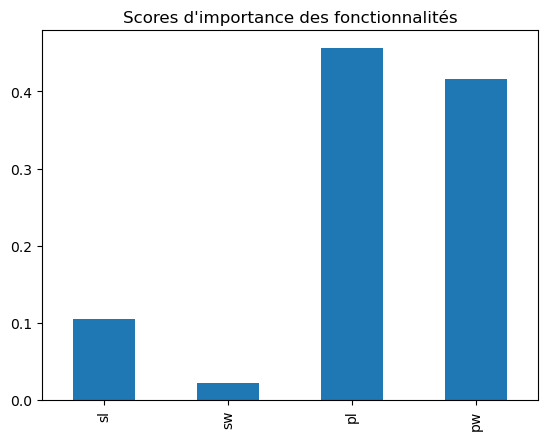

In [26]:
feature_importances.plot(kind='bar')
plt.title("Scores d'importance des fonctionnalités")
plt.show()

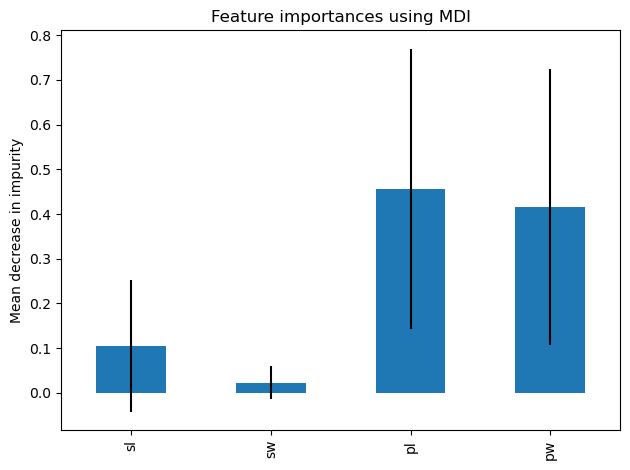

In [21]:
import pandas as pd

forest_importances = pd.Series(importances, index=features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


### Entrainer votre classifieurs avec moins de features

In [28]:
#définition des features et de la target
features = ['sl', 'sw', 'pl', ]
target = ['sp']
#split 
x_train, x_test, y_train, y_test = train_test_split(df[features],df[target],test_size=0.2)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
target = np.array(y_train)
rf.fit(x_train.values,target.ravel());
y_pred = rf.predict(x_test)
r2_score(y_test, y_pred)


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.8360655737704917

In [38]:
#définition des features et de la target
features = ['sl', 'sw' ]
target = ['sp']
#split 
x_train, x_test, y_train, y_test = train_test_split(df[features],df[target],test_size=0.2)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
target = np.array(y_train)
rf.fit(x_train.values,target.ravel());
y_pred = rf.predict(x_test)
r2_score(y_test, y_pred)


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.6309314586994728

In [42]:
#définition des features et de la target
features = ['sl', 'sw']
target = ['sp']
#split 
x_train, x_test, y_train, y_test = train_test_split(df[features],df[target],test_size=0.2)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
target = np.array(y_train)
rf.fit(x_train.values,target.ravel());
y_pred = rf.predict(x_test)
r2_score(y_test, y_pred)


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.5869191049913942

### Que constatez vous ? 

la precision avec toutes les features est superieure a celle obtenue avec moins de features